In [1]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import association_metrics as am

In [2]:
offer = pd.read_csv('../datasets/offers.csv')
offer.head()

,Id,Use Case,Status,Created Date,Close Date,Price,Discount code,Pain,Loss Reason
0,doqyhjtv,Educational Seminars,Closed Won,2019-11-17,2019-11-17,300.0,SAVEMORE50,operations,NaN
1,NaN,Sports Events,Closed Lost,2019-11-24,2019-11-25,150.0,NaN,operations,price
2,NaN,Sports Events,Closed Lost,2019-11-24,2019-11-25,768.0,HALFYEAR20G,operations,no response
3,cturqi48,Corporate Events,Closed Won,2019-05-07,2019-05-07,240.0,DISCOUNT50POWER,financial control,NaN
4,NaN,Sports Events,Closed Lost,2019-11-17,2019-11-25,240.0,SAVEMONTH50G,financial control,no response


In [3]:
offer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6130 entries, 0 to 6129
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             4962 non-null   object 
 1   Use Case       6093 non-null   object 
 2   Status         6130 non-null   object 
 3   Created Date   6130 non-null   object 
 4   Close Date     6130 non-null   object 
 5   Price          5765 non-null   float64
 6   Discount code  4431 non-null   object 
 7   Pain           5261 non-null   object 
 8   Loss Reason    2364 non-null   object 
dtypes: float64(1), object(8)
memory usage: 431.1+ KB


In [4]:
offer.describe(include='all')

,Id,Use Case,Status,Created Date,Close Date,Price,Discount code,Pain,Loss Reason
count,4962,6093,6130,6130,6130,5765.000000,4431,5261,2364
unique,4924,5,6,420,440,NaN,112,4,8
top,98pp0lyi,Corporate Events,Closed Won,2019-04-23,2020-01-26,NaN,2SEMESTERS20OFF,operations,no response
freq,4,3487,3247,56,123,NaN,553,3315,805
mean,NaN,NaN,NaN,NaN,NaN,1303.754033,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,10378.953376,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,240.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,360.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,768.000000,NaN,NaN,NaN


<AxesSubplot: >

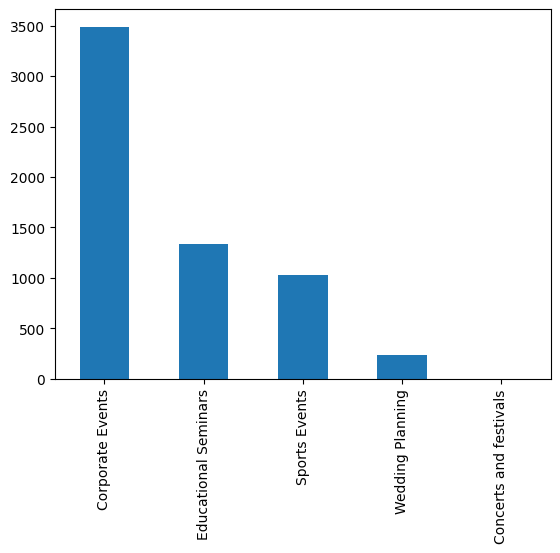

In [5]:
offer["Use Case"].value_counts().plot(kind="bar")

<AxesSubplot: >

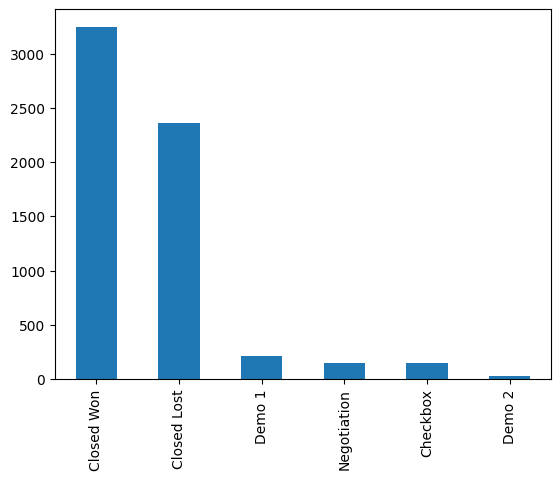

In [6]:
offer["Status"].value_counts().plot(kind="bar")

<AxesSubplot: >

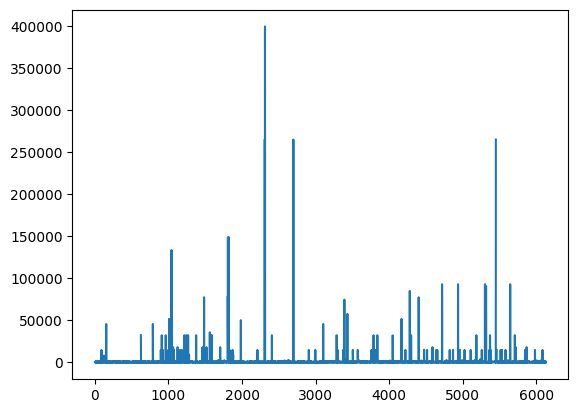

In [7]:
offer["Price"].plot()

<AxesSubplot: >

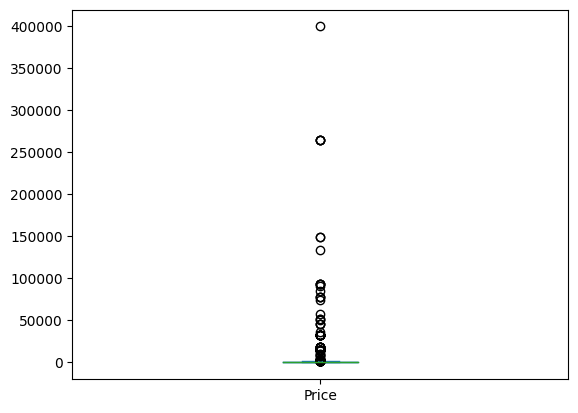

In [8]:
offer["Price"].plot.box()

In [9]:
offer["Price"].describe()

count      5765.000000
mean       1303.754033
std       10378.953376
min           0.000000
25%         240.000000
50%         360.000000
75%         768.000000
max      399304.000000
Name: Price, dtype: float64

<AxesSubplot: >

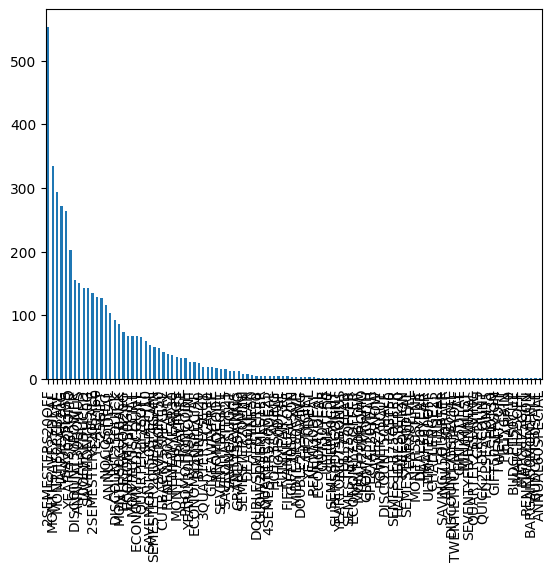

In [10]:
offer["Discount code"].value_counts().plot(kind="bar")

<AxesSubplot: >

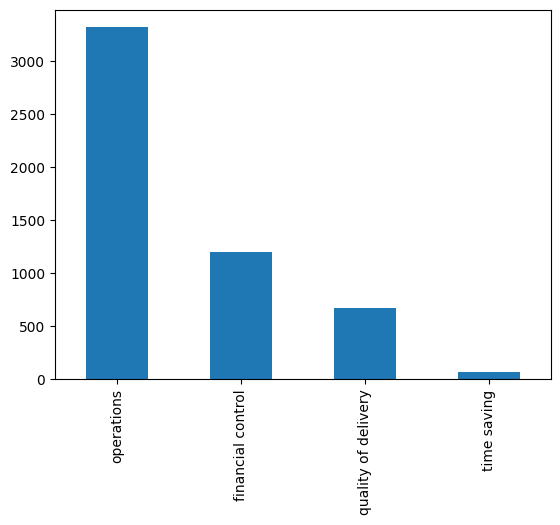

In [11]:
offer["Pain"].value_counts().plot(kind="bar")

<AxesSubplot: >

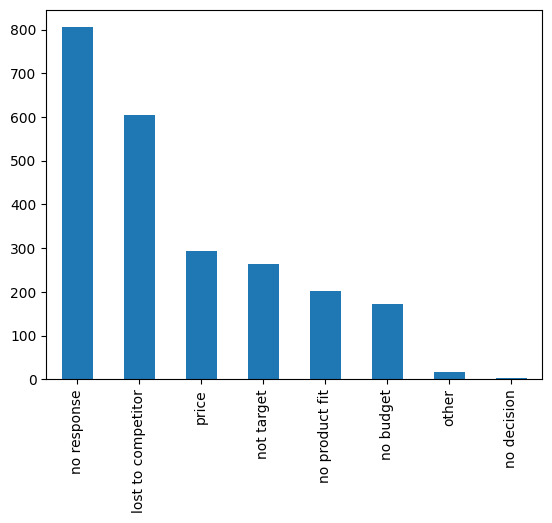

In [12]:
offer["Loss Reason"].value_counts().plot(kind="bar")

In [13]:
offer["Close Date"] = pd.to_datetime(offer["Close Date"])
offer["Created Date"] = pd.to_datetime(offer["Created Date"])
offer[["Close Date", "Created Date"]].describe()

C:\Users\EQUIPO\AppData\Local\Temp\ipykernel_9856\650644149.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  offer[["Close Date", "Created Date"]].describe()
C:\Users\EQUIPO\AppData\Local\Temp\ipykernel_9856\650644149.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  offer[["Close Date", "Created Date"]].describe()


,Close Date,Created Date
count,6130,6130
unique,440,420
top,2020-01-26 00:00:00,2019-04-23 00:00:00
freq,123,56
first,2013-12-09 00:00:00,2018-01-01 00:00:00
last,2020-10-27 00:00:00,2020-10-27 00:00:00


In [14]:
def preprocessing_time(df, time_column):
    df[time_column + "_year"] = df[time_column].dt.year
    df[time_column + "_month"] = df[time_column].dt.month
    df[time_column + "_day"] = df[time_column].dt.day
    df[time_column + "_weekday"] = df[time_column].dt.weekday
    return df

offer = preprocessing_time(offer, "Close Date")
offer = preprocessing_time(offer, "Created Date")
offer.head()

,Id,Use Case,Status,Created Date,Close Date,Price,Discount code,Pain,Loss Reason,Close Date_year,Close Date_month,Close Date_day,Close Date_weekday,Created Date_year,Created Date_month,Created Date_day,Created Date_weekday
0,doqyhjtv,Educational Seminars,Closed Won,2019-11-17,2019-11-17,300.0,SAVEMORE50,operations,NaN,2019,11,17,6,2019,11,17,6
1,NaN,Sports Events,Closed Lost,2019-11-24,2019-11-25,150.0,NaN,operations,price,2019,11,25,0,2019,11,24,6
2,NaN,Sports Events,Closed Lost,2019-11-24,2019-11-25,768.0,HALFYEAR20G,operations,no response,2019,11,25,0,2019,11,24,6
3,cturqi48,Corporate Events,Closed Won,2019-05-07,2019-05-07,240.0,DISCOUNT50POWER,financial control,NaN,2019,5,7,1,2019,5,7,1
4,NaN,Sports Events,Closed Lost,2019-11-17,2019-11-25,240.0,SAVEMONTH50G,financial control,no response,2019,11,25,0,2019,11,17,6


<AxesSubplot: >

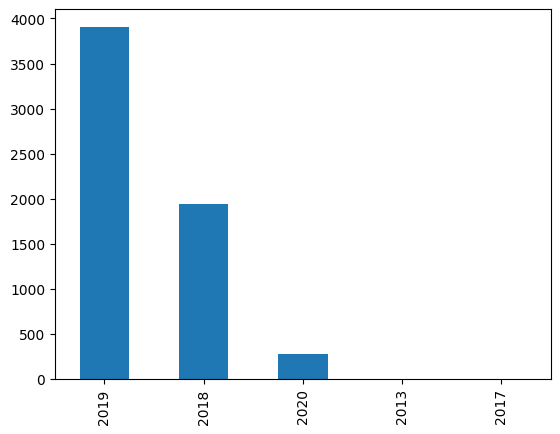

In [15]:
offer["Close Date_year"].value_counts().plot(kind="bar")

<AxesSubplot: >

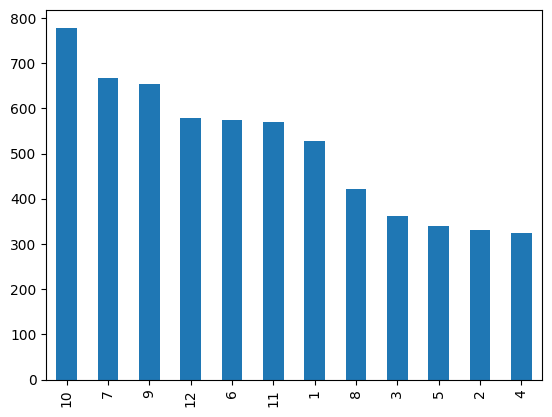

In [16]:
offer["Close Date_month"].value_counts().plot(kind="bar")

<AxesSubplot: >

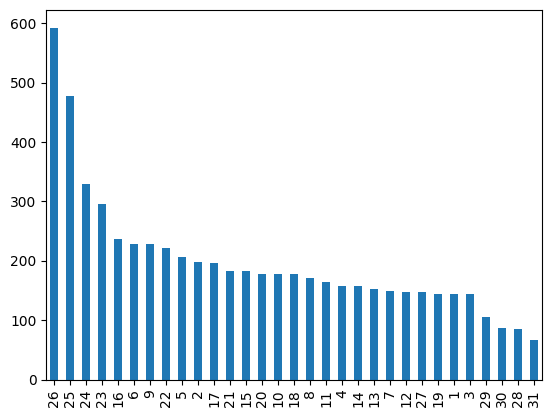

In [17]:
offer["Close Date_day"].value_counts().plot(kind="bar")

<AxesSubplot: >

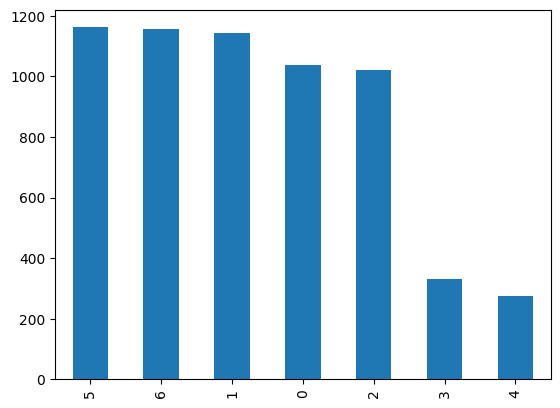

In [18]:
offer["Close Date_weekday"].value_counts().plot(kind="bar")

<AxesSubplot: >

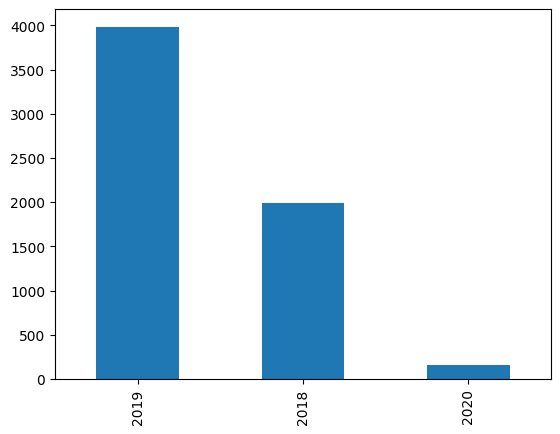

In [19]:
offer["Created Date_year"].value_counts().plot(kind="bar")

<AxesSubplot: >

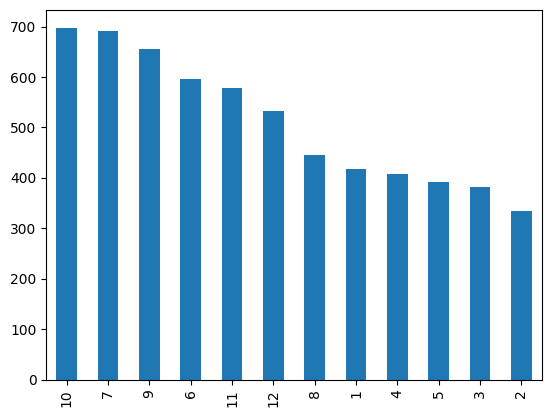

In [20]:
offer["Created Date_month"].value_counts().plot(kind="bar")

<AxesSubplot: >

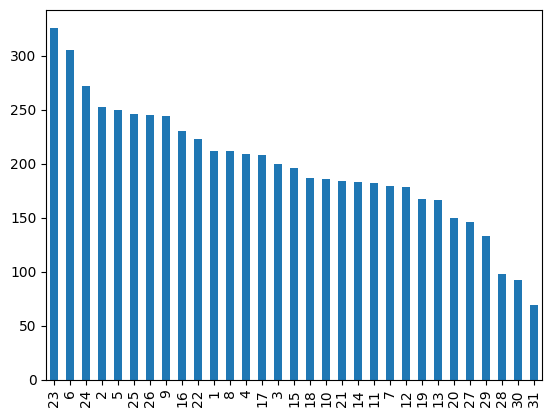

In [21]:
offer["Created Date_day"].value_counts().plot(kind="bar")

<AxesSubplot: >

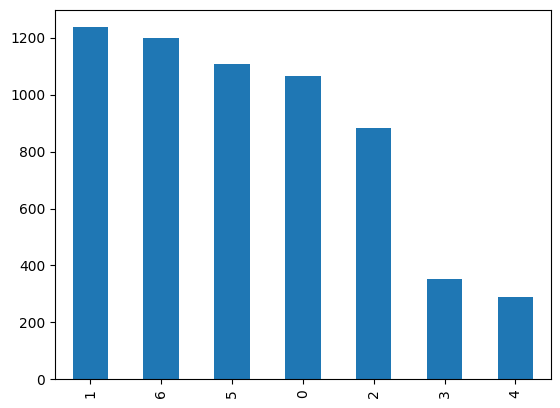

In [22]:
offer["Created Date_weekday"].value_counts().plot(kind="bar")

<AxesSubplot: >

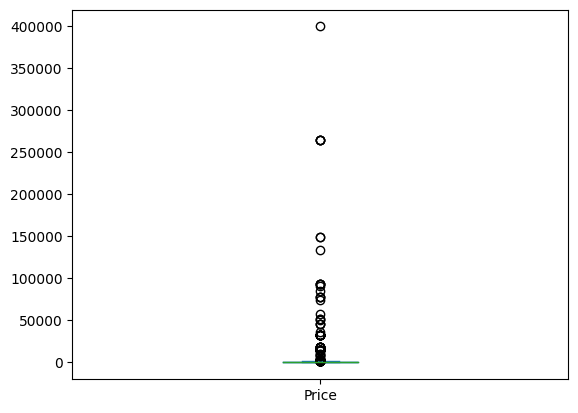

In [23]:
offer["Price"].plot.box()

<AxesSubplot: >

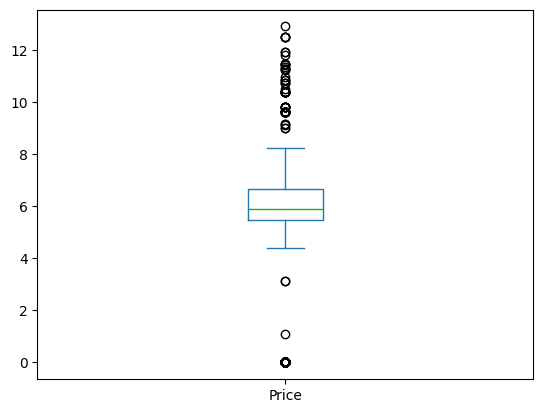

In [24]:
log_price = np.log(offer[~offer["Price"].isnull()]["Price"] +1 )
log_price.plot.box()

C:\Users\EQUIPO\AppData\Local\Temp\ipykernel_9856\67872171.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  seaborn.distplot(log_price)


<AxesSubplot: xlabel='Price', ylabel='Density'>

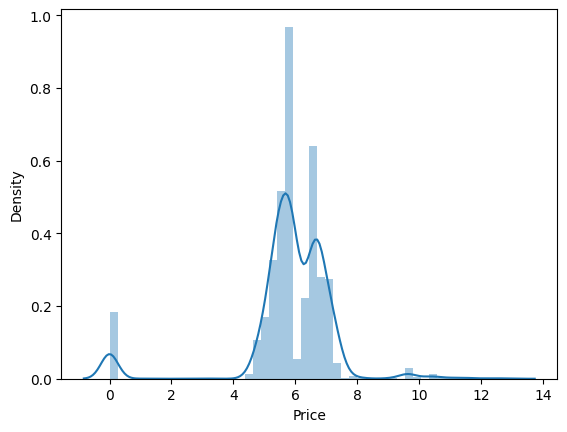

In [25]:
seaborn.distplot(log_price)

<AxesSubplot: >

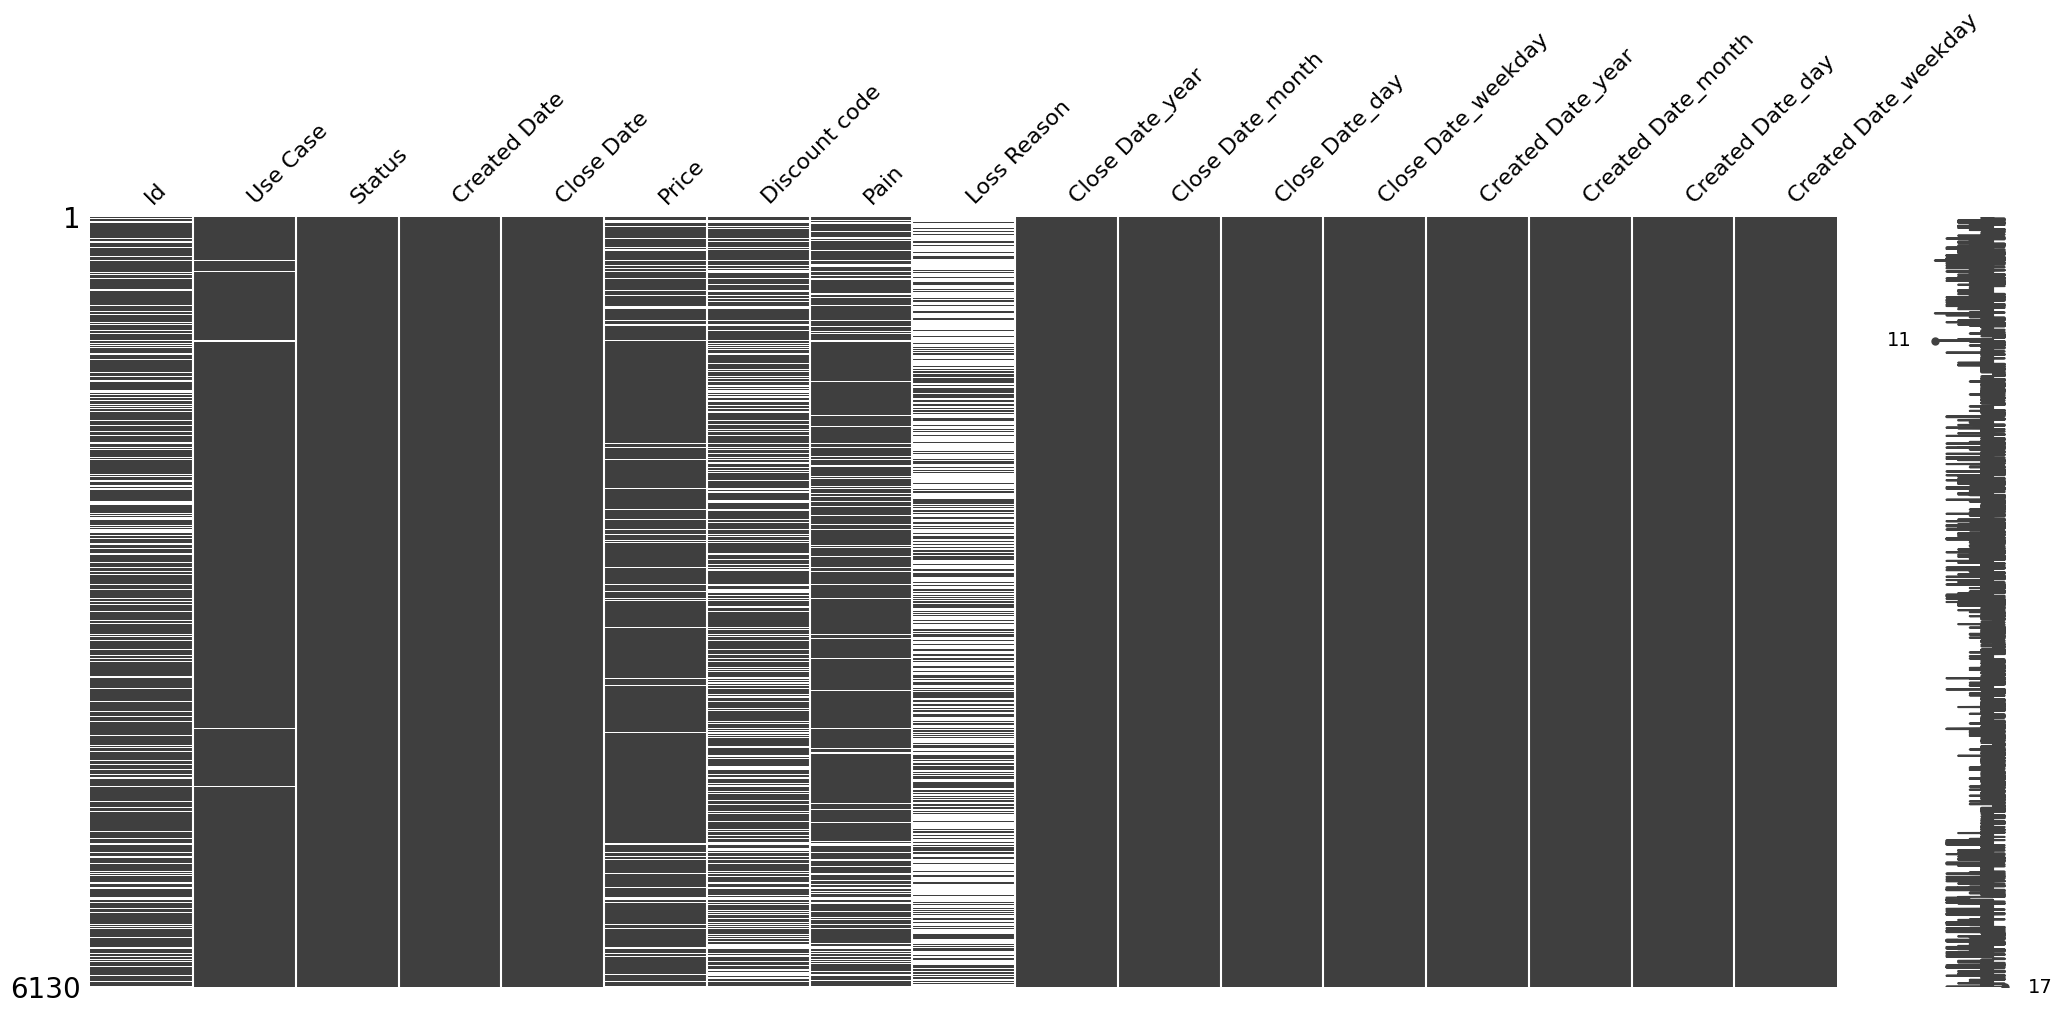

In [26]:
#Missing values in datatime
msno.matrix(offer)

<AxesSubplot: >

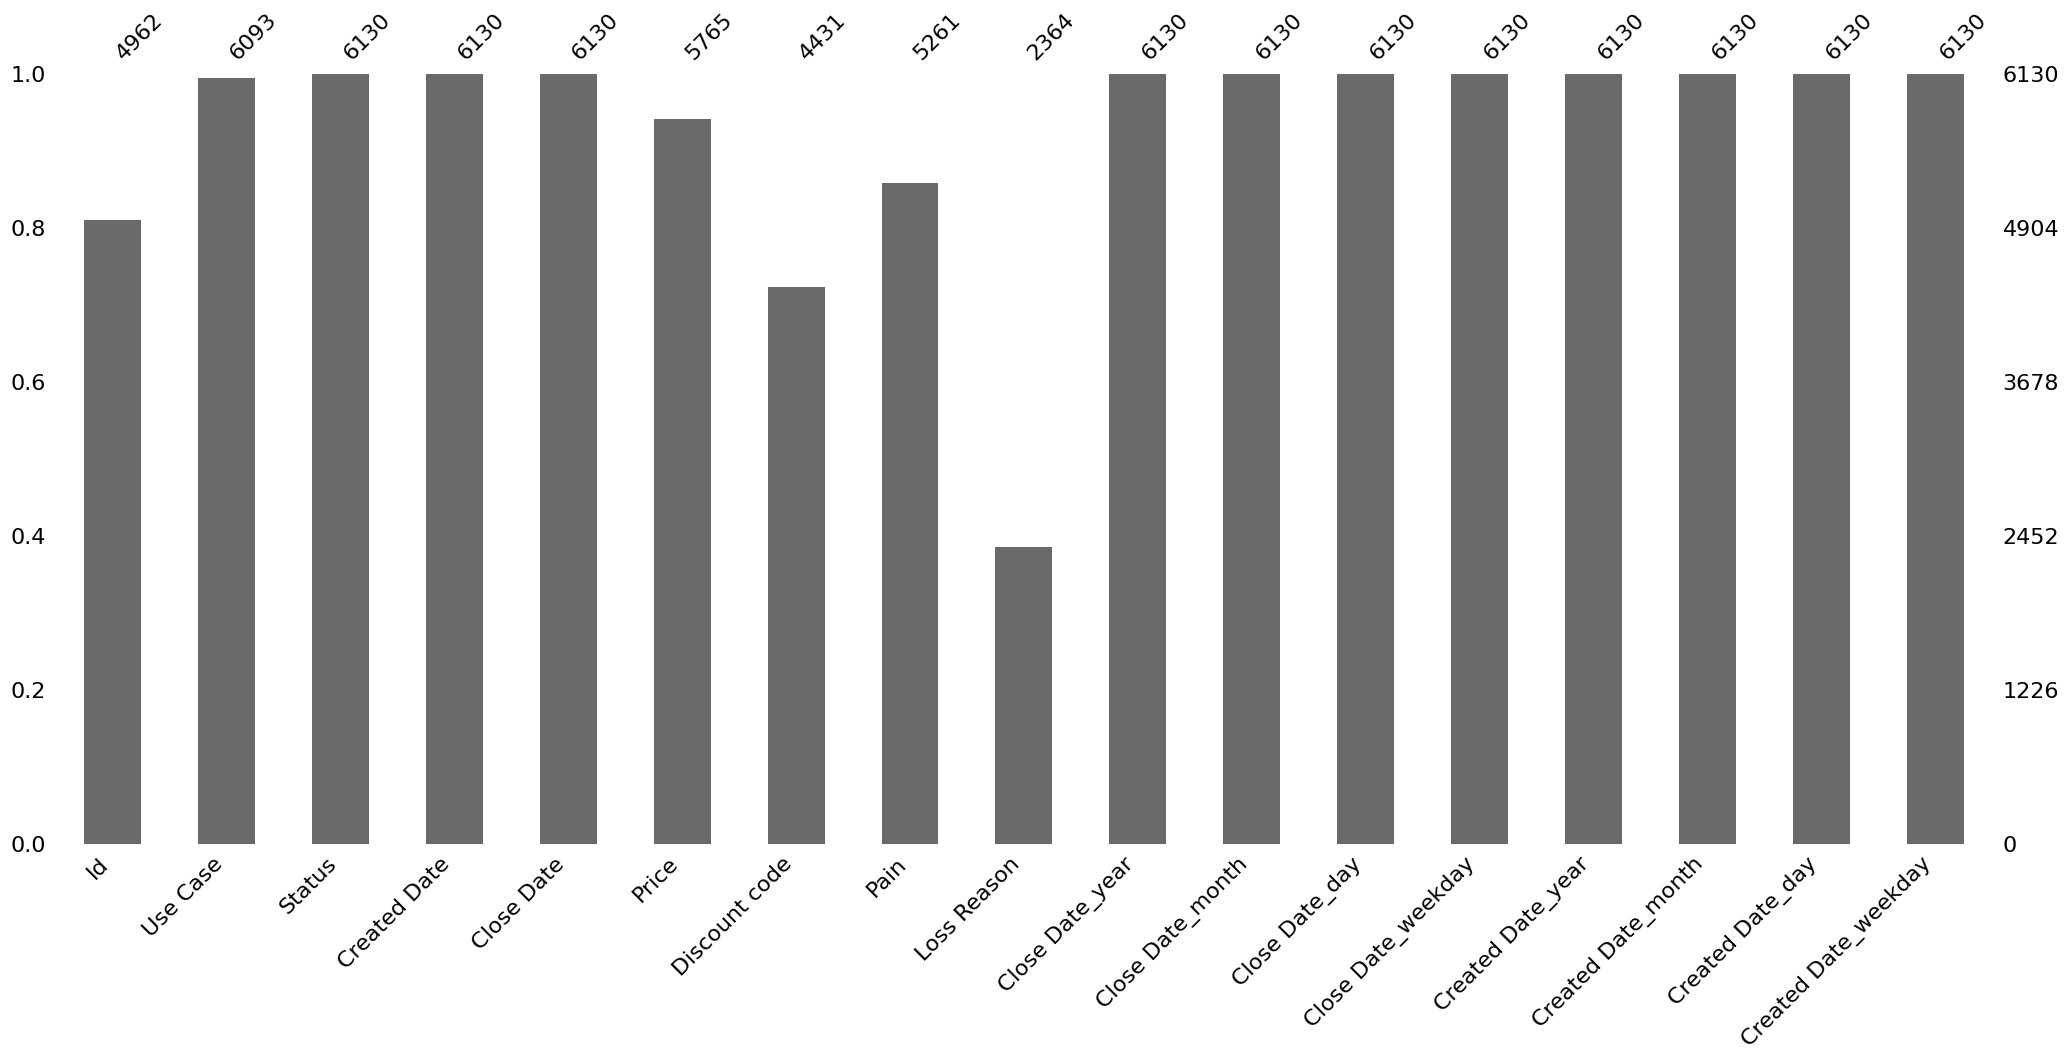

In [27]:
msno.bar(offer)

<AxesSubplot: >

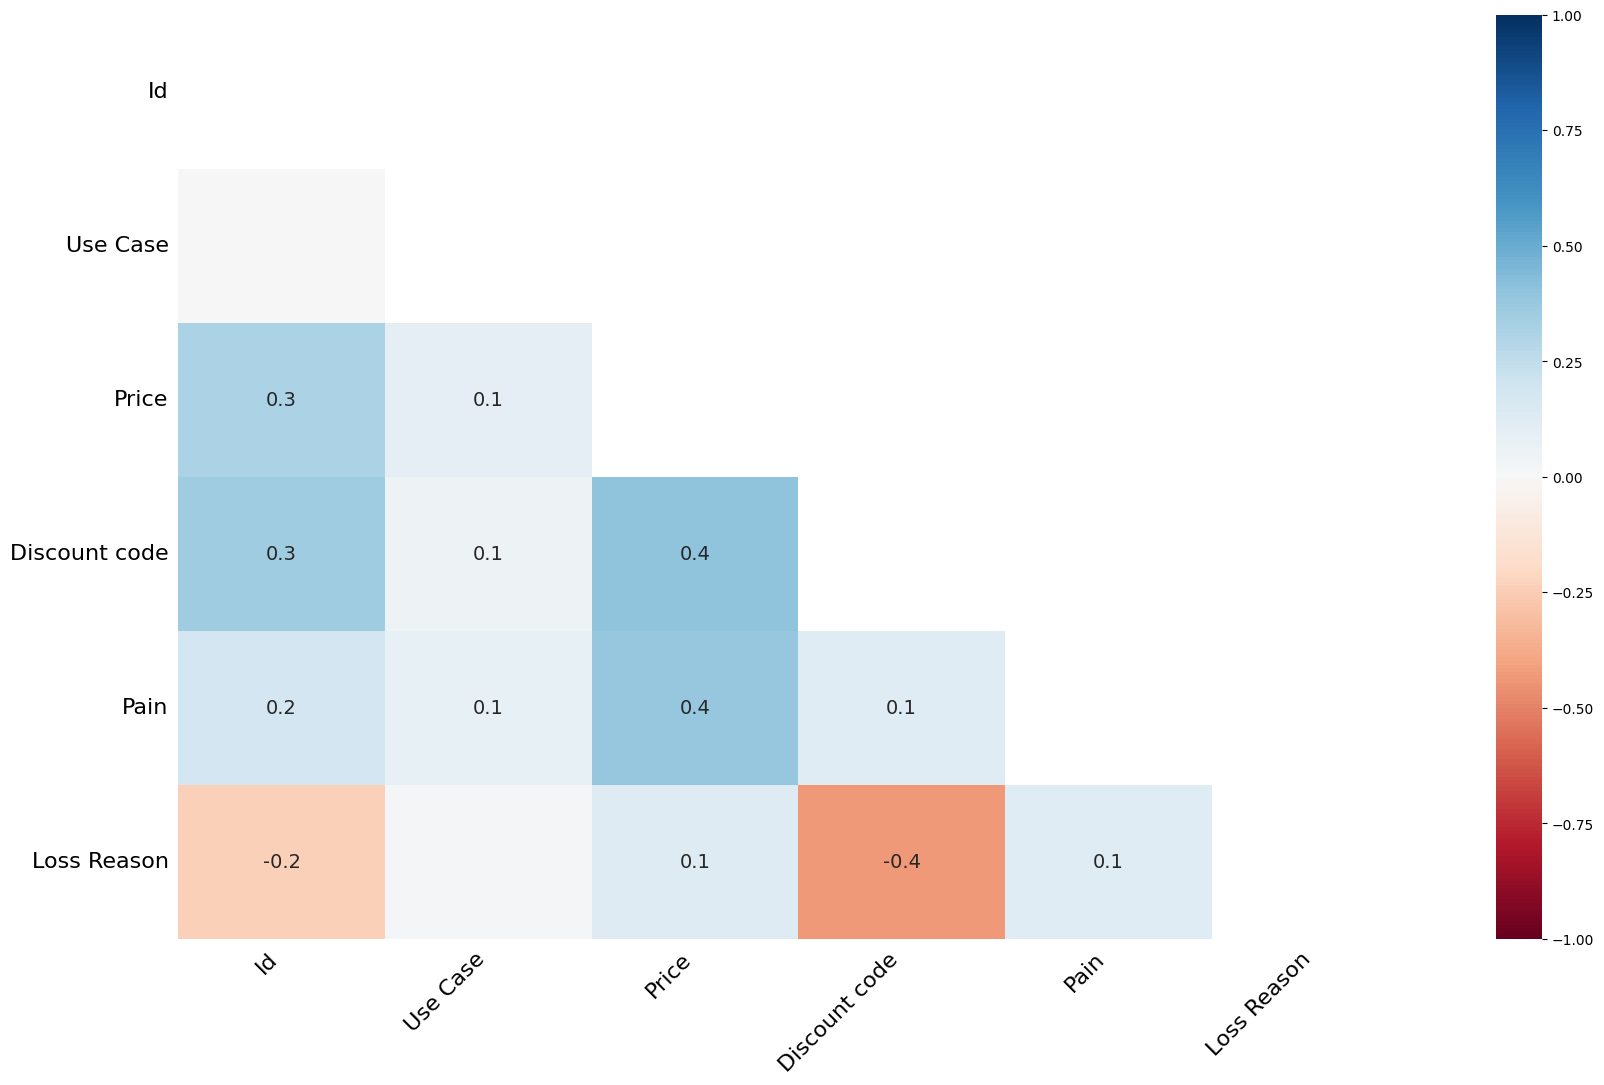

In [28]:
msno.heatmap(offer)

<AxesSubplot: >

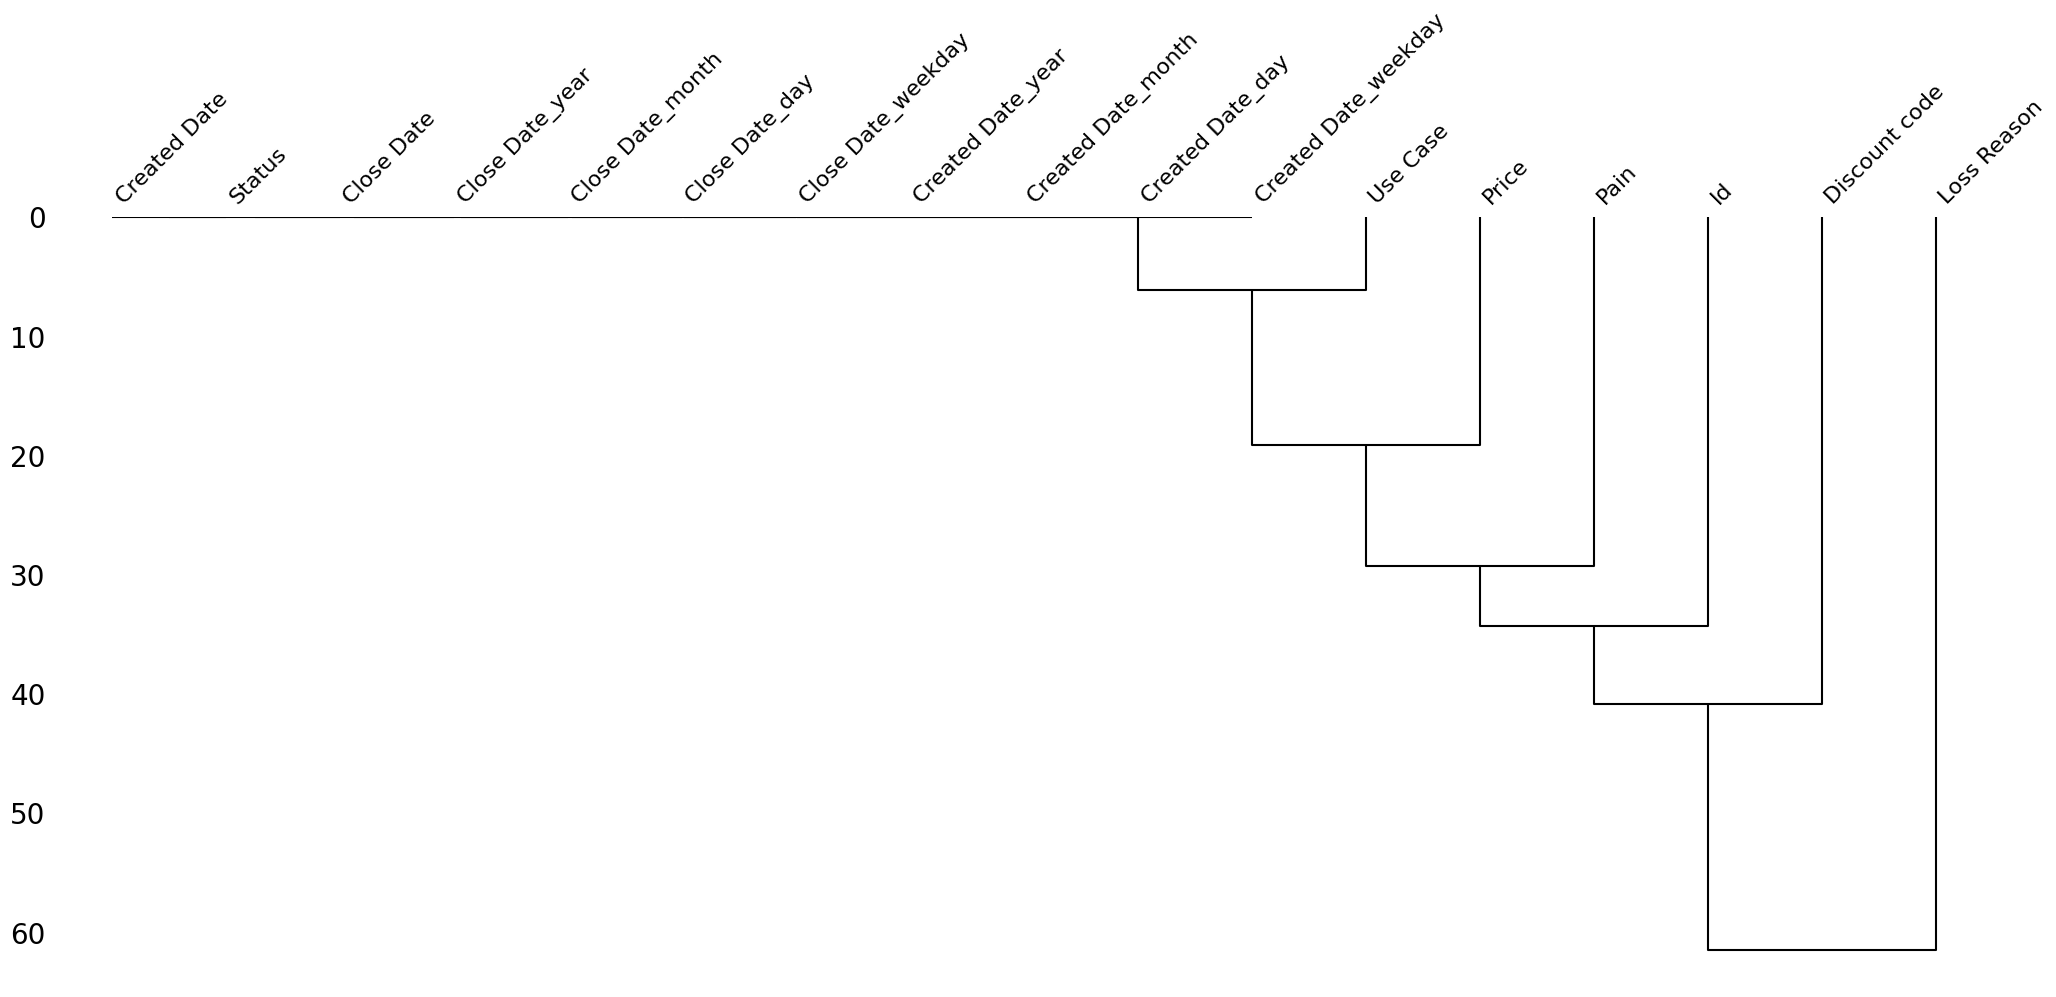

In [29]:
msno.dendrogram(offer)

In [30]:
offer["Duration"] = (offer["Close Date"] - offer["Created Date"])/np.timedelta64(1, 'D')
offer["Duration"].describe()

count    6130.000000
mean       11.777977
std        77.282724
min     -1665.000000
25%         0.000000
50%         0.000000
75%         9.000000
max       600.000000
Name: Duration, dtype: float64

<AxesSubplot: >

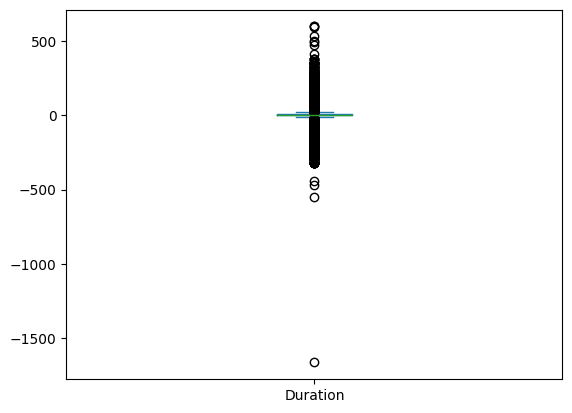

In [31]:
offer["Duration"].plot.box()

<AxesSubplot: >

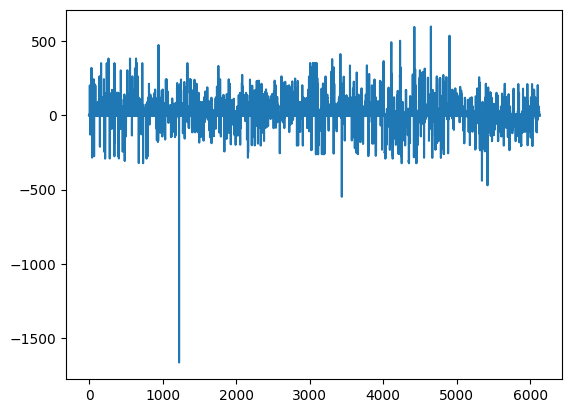

In [32]:
offer["Duration"].plot()

In [33]:
offer_negative_duration = offer[offer["Duration"] < 0]
offer_negative_duration

,Id,Use Case,Status,Created Date,Close Date,Price,Discount code,Pain,Loss Reason,Close Date_year,Close Date_month,Close Date_day,Close Date_weekday,Created Date_year,Created Date_month,Created Date_day,Created Date_weekday,Duration
17,9i1sfcw2,Corporate Events,Closed Won,2019-11-13,2019-07-07,240.0,MONTH50REBATE,operations,NaN,2019,7,7,6,2019,11,13,2,-129.0
42,afivu0ad,Corporate Events,Closed Won,2019-11-18,2019-02-07,120.0,3QUARTERS75CUT,operations,NaN,2019,2,7,3,2019,11,18,0,-284.0
69,x8ef2uaj,Corporate Events,Demo 1,2020-10-27,2020-01-26,240.0,DISCOUNT50POWER,financial control,NaN,2020,1,26,6,2020,10,27,1,-275.0
148,NaN,Wedding Planning,Closed Lost,2019-08-06,2019-01-07,NaN,NaN,NaN,no budget,2019,1,7,0,2019,8,6,1,-211.0
204,NaN,Corporate Events,Demo 1,2020-03-27,2020-01-26,NaN,NaN,operations,NaN,2020,1,26,6,2020,3,27,4,-61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6084,jo9b1bff,Educational Seminars,Closed Won,2019-07-30,2019-04-08,14876.0,CUTBACK75SPECIAL,NaN,NaN,2019,4,8,0,2019,7,30,1,-113.0
6086,NaN,Sports Events,Closed Lost,2019-07-30,2019-04-16,NaN,NaN,time saving,no response,2019,4,16,1,2019,7,30,1,-105.0
6088,NaN,Sports Events,Closed Lost,2019-07-30,2019-04-16,360.0,NaN,financial control,price,2019,4,16,1,2019,7,30,1,-105.0
6089,fzwvu95g,Corporate Events,Closed Won,2019-07-30,2019-04-08,360.0,MONTHSAVE25DEAL,NaN,NaN,2019,4,8,0,2019,7,30,1,-113.0


<AxesSubplot: >

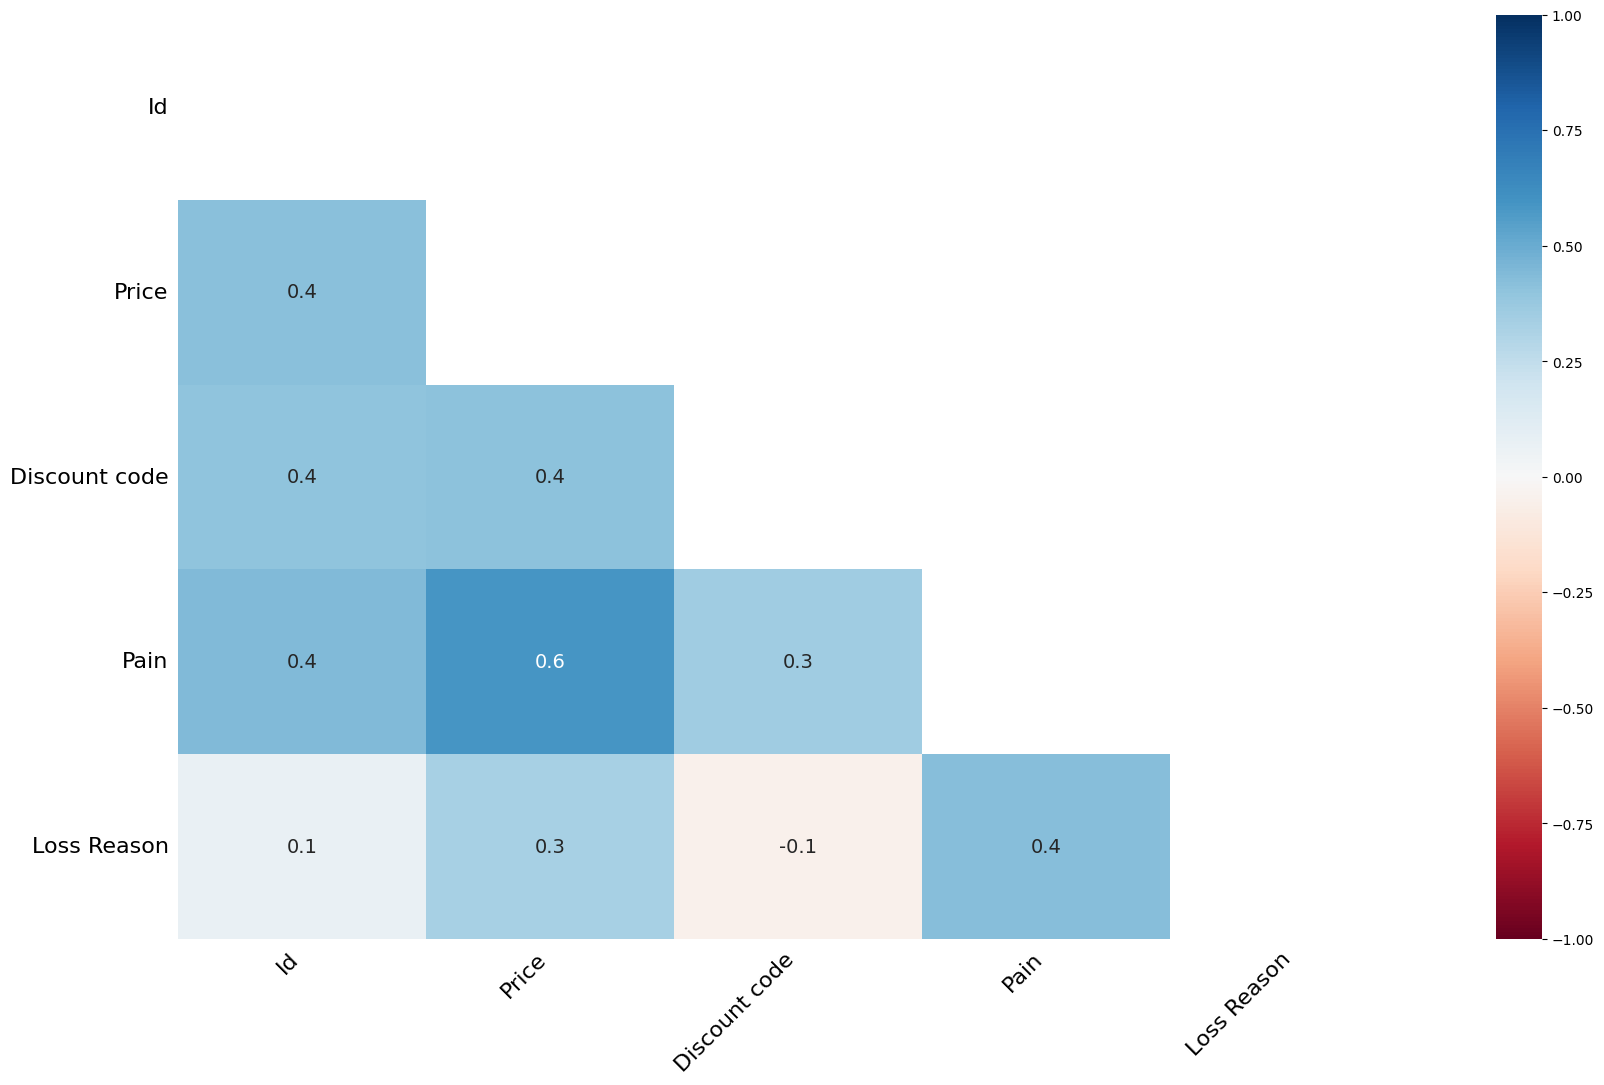

In [34]:
msno.heatmap(offer_negative_duration)

<AxesSubplot: >

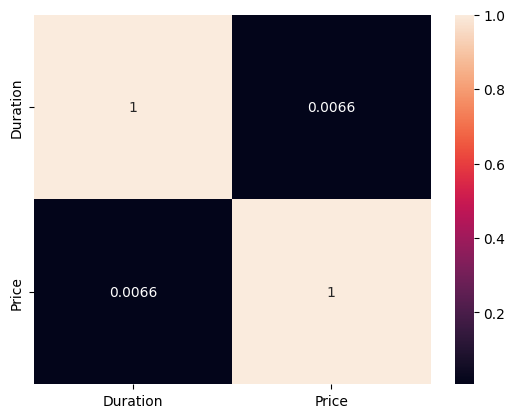

In [35]:
corr = offer_negative_duration[["Duration", "Price"]].corr()
seaborn.heatmap(corr, annot=True)

<AxesSubplot: >

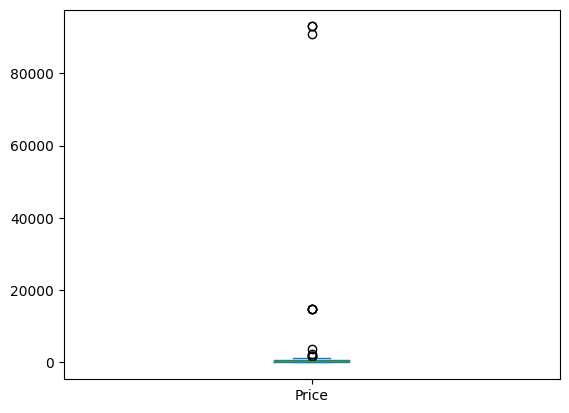

In [36]:
offer_negative_duration["Price"].plot.box()

c:\Users\EQUIPO\Desktop\personal\shimoku\env\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot: >

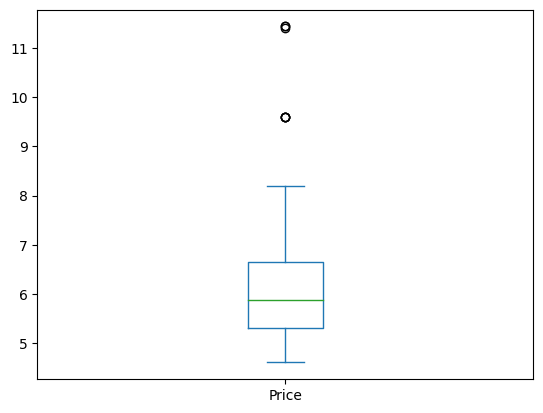

In [37]:
log_price = np.log(offer_negative_duration["Price"])
log_price.plot.box()

<AxesSubplot: >

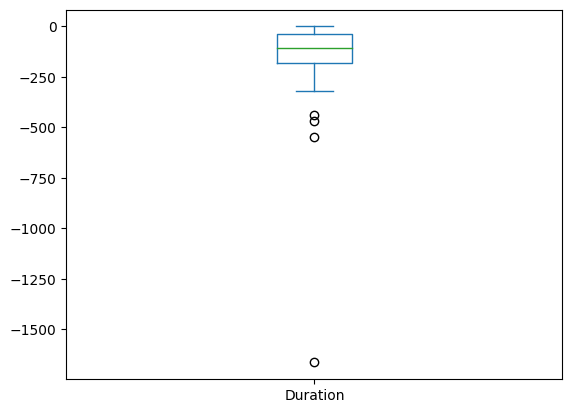

In [38]:
offer_negative_duration["Duration"].plot.box()

<AxesSubplot: >

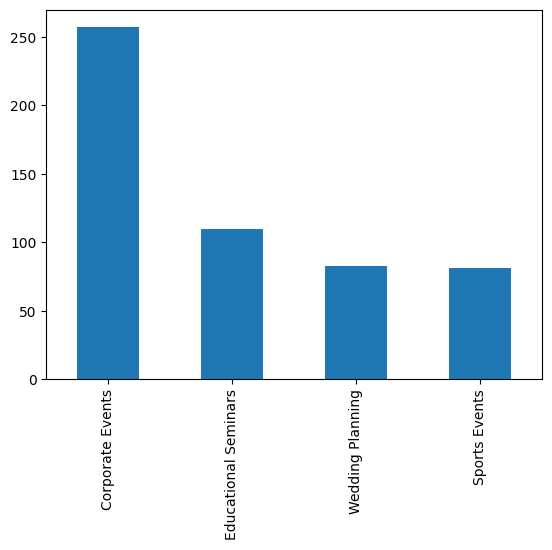

In [39]:
offer_negative_duration["Use Case"].value_counts().plot(kind="bar")

<AxesSubplot: >

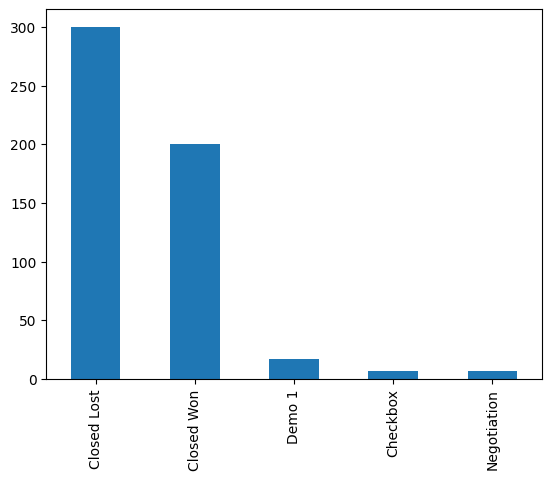

In [40]:
offer_negative_duration["Status"].value_counts().plot(kind="bar")

<AxesSubplot: >

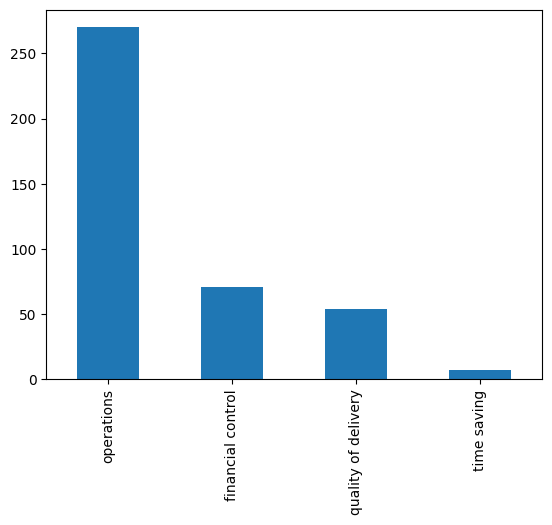

In [41]:
offer_negative_duration["Pain"].value_counts().plot(kind="bar")

In [42]:
#create a is_null values columns
columns_with_null = offer.columns[offer.isnull().any()]
for column in columns_with_null:
    offer[column + "_is_null"] = offer[column].isnull()

In [43]:
columns_with_null

Index(['Id', 'Use Case', 'Price', 'Discount code', 'Pain', 'Loss Reason'], dtype='object')

In [44]:
numerical = offer.select_dtypes(include=np.number)
numerical.head()

,Price,Close Date_year,Close Date_month,Close Date_day,Close Date_weekday,Created Date_year,Created Date_month,Created Date_day,Created Date_weekday,Duration
0,300.0,2019,11,17,6,2019,11,17,6,0.0
1,150.0,2019,11,25,0,2019,11,24,6,1.0
2,768.0,2019,11,25,0,2019,11,24,6,1.0
3,240.0,2019,5,7,1,2019,5,7,1,0.0
4,240.0,2019,11,25,0,2019,11,17,6,8.0


C:\Users\EQUIPO\AppData\Local\Temp\ipykernel_9856\1617603542.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Loss Reason"] = test["Loss Reason"].fillna(mode)
C:\Users\EQUIPO\AppData\Local\Temp\ipykernel_9856\1617603542.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[column] = test[column].astype('category')
C:\Users\EQUIPO\AppData\Local\Temp\ipykernel_9856\1617603542.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

<AxesSubplot: >

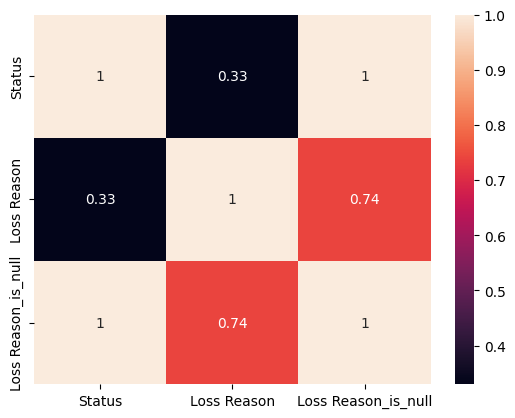

In [45]:
test = offer[["Status", "Loss Reason", "Loss Reason_is_null"]]
mode = offer["Loss Reason"].mode()[0]
test["Loss Reason"] = test["Loss Reason"].fillna(mode)
for column in test.columns:
    test[column] = test[column].astype('category')

cramers_v = am.CramersV(test)
test = cramers_v.fit().round(2)
seaborn.heatmap(test, annot=True)

In [46]:
columns_categorical = list(offer.select_dtypes("object").columns)
columns_categorical += list(map(lambda x: x + "_is_null", columns_with_null))
columns_categorical

['Id',
 'Use Case',
 'Status',
 'Discount code',
 'Pain',
 'Loss Reason',
 'Id_is_null',
 'Use Case_is_null',
 'Price_is_null',
 'Discount code_is_null',
 'Pain_is_null',
 'Loss Reason_is_null']

C:\Users\EQUIPO\AppData\Local\Temp\ipykernel_9856\1216903003.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[column] = test_df[column].astype('category')
C:\Users\EQUIPO\AppData\Local\Temp\ipykernel_9856\1216903003.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[column] = test_df[column].astype('category')
C:\Users\EQUIPO\AppData\Local\Temp\ipykernel_9856\1216903003.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

<AxesSubplot: >

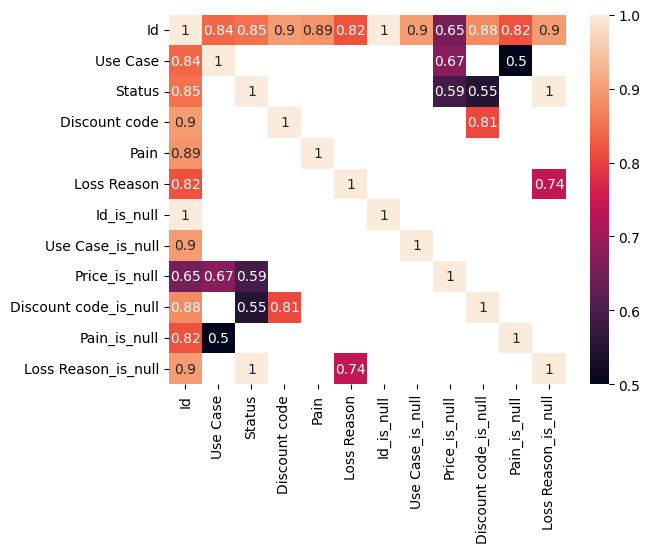

In [47]:
test_df = offer[columns_categorical]
# Changes the type of the columns to categorical

for column in test_df.columns:
    test_df[column] = test_df[column].astype('category')

# Impute mode
test_df = test_df.apply(lambda x:x.fillna(x.value_counts().index[0]))
cramers_v = am.CramersV(test_df)
test = cramers_v.fit().round(2)
seaborn.heatmap(test[test>=0.5], annot=True)

In [48]:
numerical = [column for column in numerical.columns if column not in columns_categorical]

<AxesSubplot: >

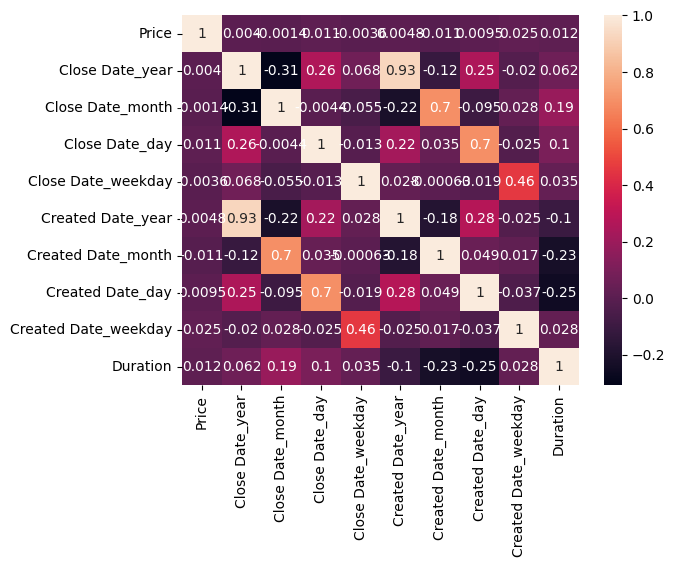

In [49]:
corr = offer[numerical].corr()
seaborn.heatmap(corr, annot=True)

In [50]:
offer[["Status", "Price_is_null"]].groupby("Status").agg(["sum"])

,Price_is_null
,sum
Status,
Checkbox,1
Closed Lost,50
Closed Won,132
Demo 1,164
Demo 2,10
Negotiation,8


<AxesSubplot: xlabel='Status'>

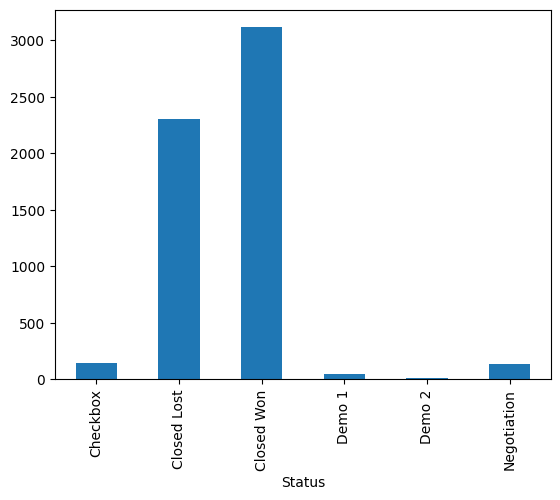

In [51]:
group = offer[["Status", "Price_is_null"]].groupby("Status").agg(["sum", "count"])
group["percentage"] =group["Price_is_null"]["count"] -  group["Price_is_null"]["sum"]
group["percentage"].plot(kind="bar")

In [52]:
ids = offer["Id"].value_counts()
ids[ids > 1].count()

36

In [53]:
ids[ids > 1].index

Index(['98pp0lyi', 'anusqayo', 'p5p3jdar', 'd4bsqkru', 'hfgdr40r', 'xwe4j4jj',
       's4odpis2', 'vs1d9b6t', '85hvce1u', '96ahk1t4', 'oqdli760', 'z52nyf59',
       'wjd4o182', 'giqid1lq', 'm3ui02u5', 'j90atvpj', 'jzca62aj', 'qhcwgvqj',
       's4l7fe1m', 'bk2f6w03', '9epuqolx', 'yucfip9f', 'ce9tfu7k', 'pm6irehj',
       'zffapz33', '8i2d003s', '3npqoa77', 'cmk7rx2w', 'y3dc5m36', 'bjgqu5pj',
       'm0dyd2i7', 'zptwoiyk', 'ibreb91k', '4m6zavsg', 'pnzvissb', 'g5q27v0e'],
      dtype='object')

In [54]:
offer[offer.Id == "qhcwgvqj"][["Price", "Pain", "Created Date", "Close Date", "Status"]]

,Price,Pain,Created Date,Close Date,Status
2201,0.0,NaN,2019-07-23,2019-07-24,Closed Won
4033,768.0,operations,2019-01-21,2019-01-14,Closed Lost


<AxesSubplot: xlabel='Status', ylabel='Price'>

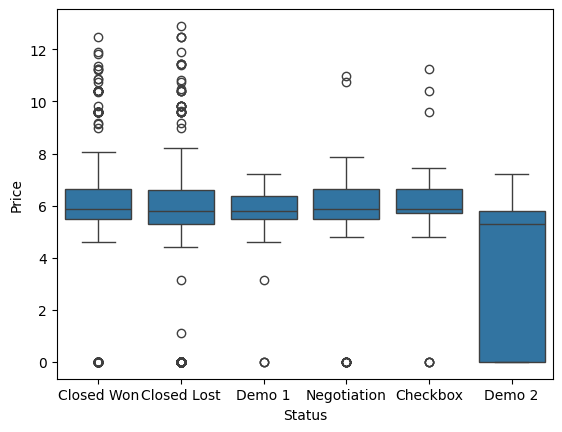

In [55]:
seaborn.boxplot(x="Status", y=np.log(offer.Price +1), data=offer)

<AxesSubplot: >

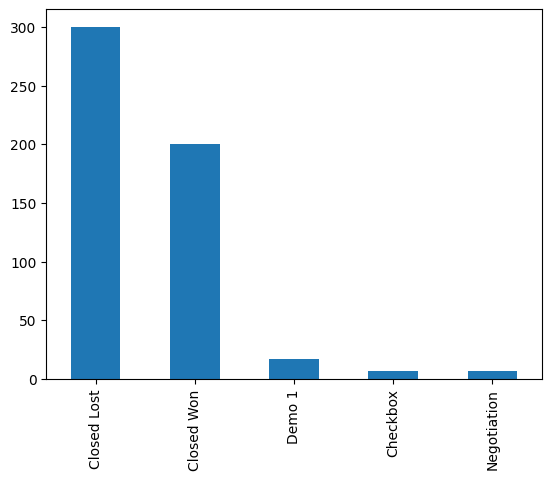

In [57]:
negative_duration = offer[offer["Duration"] < 0]
negative_duration["Status"].value_counts().plot(kind="bar")

In [58]:
negative_duration[["Created Date", "Close Date", "Duration", "Status"]].sort_values("Duration")

,Created Date,Close Date,Duration,Status
1224,2018-07-01,2013-12-09,-1665.0,Closed Won
3436,2018-10-22,2017-04-22,-548.0,Closed Won
5416,2019-04-23,2018-01-07,-471.0,Closed Won
5341,2019-04-23,2018-02-07,-440.0,Closed Won
4348,2019-11-26,2019-01-08,-322.0,Closed Won
...,...,...,...,...
5142,2019-05-22,2019-05-21,-1.0,Closed Lost
295,2019-11-24,2019-11-23,-1.0,Closed Lost
5920,2019-06-29,2019-06-28,-1.0,Closed Won
5027,2019-03-26,2019-03-25,-1.0,Closed Lost


In [59]:
negative_duration[negative_duration["Duration"]<-1][["Created Date", "Close Date", "Duration", "Status"]].sort_values("Duration")

,Created Date,Close Date,Duration,Status
1224,2018-07-01,2013-12-09,-1665.0,Closed Won
3436,2018-10-22,2017-04-22,-548.0,Closed Won
5416,2019-04-23,2018-01-07,-471.0,Closed Won
5341,2019-04-23,2018-02-07,-440.0,Closed Won
4348,2019-11-26,2019-01-08,-322.0,Closed Won
...,...,...,...,...
5018,2019-03-29,2019-03-26,-3.0,Closed Lost
1991,2019-07-20,2019-07-18,-2.0,Closed Won
1928,2019-07-17,2019-07-15,-2.0,Closed Lost
5099,2019-03-26,2019-03-24,-2.0,Closed Lost


<AxesSubplot: ylabel='Frequency'>

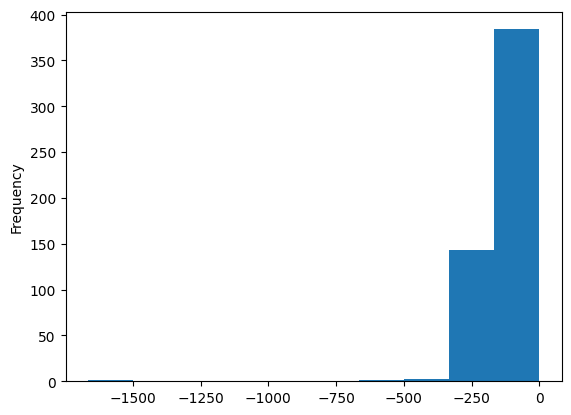

In [60]:
negative_duration["Duration"].plot.hist()

<AxesSubplot: ylabel='Frequency'>

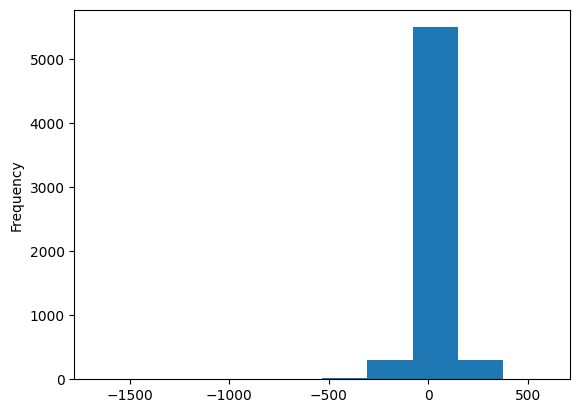

In [61]:
offer["Duration"].plot.hist()

In [62]:
offer[offer["Duration"] < -500][["Created Date", "Close Date", "Duration", "Status"]].sort_values("Duration")

,Created Date,Close Date,Duration,Status
1224,2018-07-01,2013-12-09,-1665.0,Closed Won
3436,2018-10-22,2017-04-22,-548.0,Closed Won


In [63]:
np.abs(offer.Duration)

0       0.0
1       1.0
2       1.0
3       0.0
4       8.0
       ... 
6125    1.0
6126    0.0
6127    0.0
6128    6.0
6129    1.0
Name: Duration, Length: 6130, dtype: float64

<AxesSubplot: xlabel='Status', ylabel='Duration'>

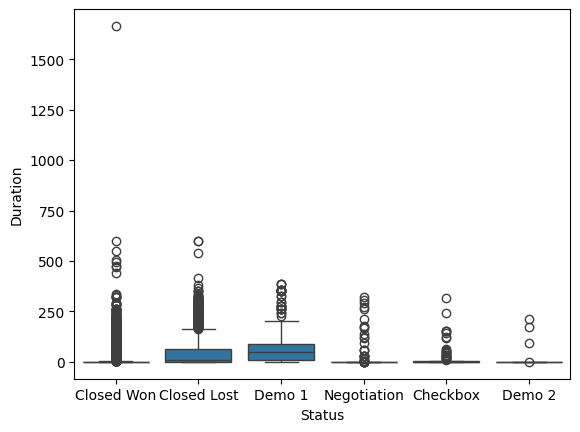

In [64]:

seaborn.boxplot(x="Status", y=np.abs(offer.Duration), data=offer)

In [65]:
offer["Duration"] = np.abs(offer.Duration)
offer.groupby("Status")["Duration"].describe()

,count,mean,std,min,25%,50%,75%,max
Status,,,,,,,,
Checkbox,144.0,14.798611,44.049175,0.0,0.0,0.0,3.25,318.0
Closed Lost,2358.0,50.005513,77.235148,0.0,1.0,10.0,66.00,600.0
Closed Won,3247.0,18.372652,59.406603,0.0,0.0,0.0,2.00,1665.0
Demo 1,209.0,87.578947,105.581334,0.0,12.0,48.0,91.00,384.0
Demo 2,26.0,18.423077,54.721969,0.0,0.0,0.0,0.00,214.0
Negotiation,146.0,20.808219,62.744728,0.0,0.0,0.0,0.00,321.0


In [67]:
offer.to_csv("../datasets/offers_transform.csv", index=False)